In [27]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import acf, pacf , adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams
from cycler import cycler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [60]:
! pip install pmdarima -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Data Preprocessing

### Download Data from Yahoo Finance


In [95]:
df = yf.download('AAPL', start='2017-01-01', end='2022-12-05')
close_price=df['Close']
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000
2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111224400
2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,147.809998,65421400


### Visualizing the Time series

Text(0, 0.5, 'Prices ($)')

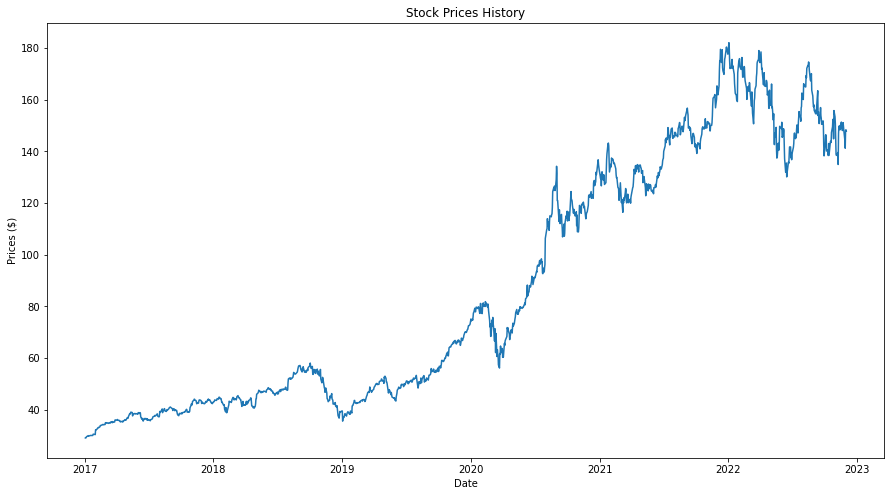

In [4]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(close_price)
plt.xlabel('Date')
plt.ylabel('Prices ($)')

### Stationary Test -- Original Time Series

In [5]:
def ADF_test(tseries):
    ADF = adfuller(tseries)
    print('ADF Statistic: {}'.format(ADF[0]))
    print('p-value: {}'.format(ADF[1]))
    print('Critical Values:')
    for key, value in ADF[4].items():
        print('\t{}: {}'.format(key, value))

In [6]:
ADF_test(close_price)

ADF Statistic: -0.6690481215764046
p-value: 0.8546047245091831
Critical Values:
	1%: -3.434812378381713
	5%: -2.863510846577674
	10%: -2.5678192598690317


### First Differenced Time Series

In [7]:
df_diff = df.diff()
df_diff = df_diff.dropna()

In [8]:
close_price_diff = df_diff['Close']

### Visualizing The First Differenced Time Series

Text(0, 0.5, 'Prices ($)')

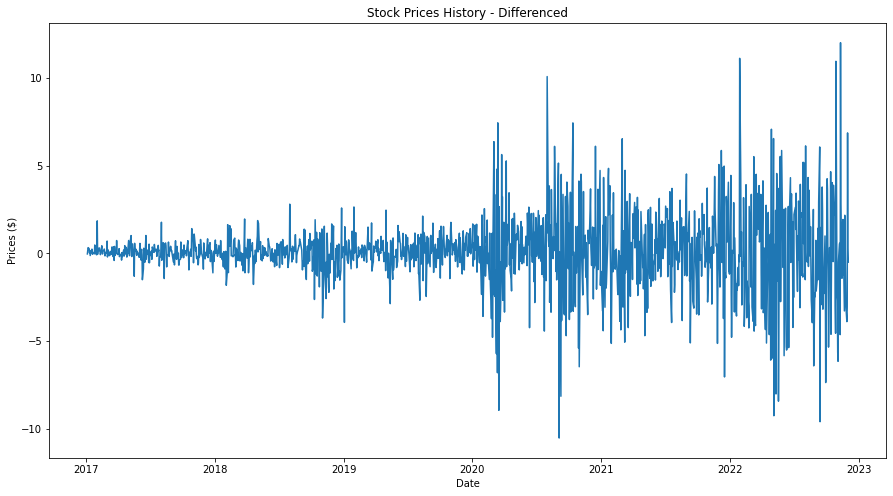

In [9]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History - Differenced')
plt.plot(close_price_diff)
plt.xlabel('Date')
plt.ylabel('Prices ($)')

### Stationary Test on First Differenced Time Series

In [10]:
ADF_test(close_price_diff)

ADF Statistic: -8.096518666144945
p-value: 1.3345363292373078e-12
Critical Values:
	1%: -3.434812378381713
	5%: -2.863510846577674
	10%: -2.5678192598690317


### ACF/PACF to Determine AR and MA Orders

In [11]:
acf_values = acf(close_price_diff)
acf_values

array([ 1.00000000e+00, -6.35400881e-02, -2.75730782e-02, -2.85288105e-02,
        1.14004837e-02,  5.33008269e-02, -3.87428750e-02,  2.41168677e-02,
       -8.10386603e-02,  5.69955685e-02, -4.32135016e-02,  6.11316757e-02,
       -1.09293198e-02, -1.87658418e-02,  1.72997309e-02, -4.12564474e-02,
        3.64514364e-02, -2.43286365e-02,  9.72532528e-02,  8.50528068e-03,
       -4.63066819e-02,  1.07407980e-02, -5.04848479e-02,  2.77332141e-02,
       -1.18985051e-02, -9.24973253e-04, -3.72852744e-02,  3.67003907e-02,
       -1.15233955e-02,  9.48725625e-03, -3.64373359e-02, -3.53145012e-02])

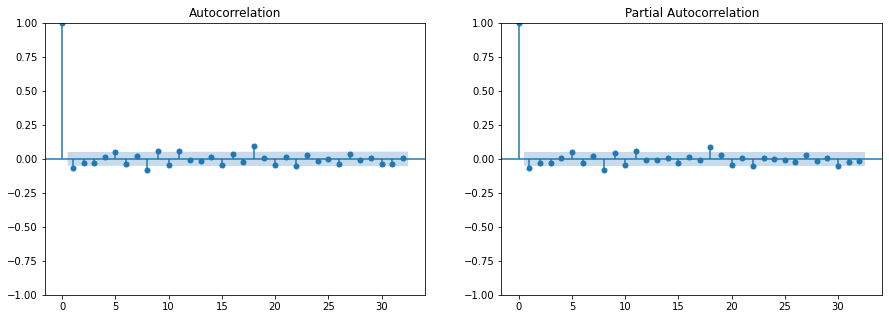

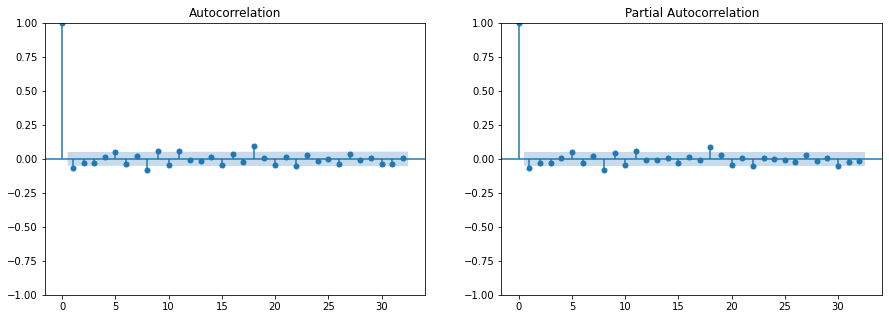

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_title('ACF')
axes[1].set_title('PACF')
plot_acf(close_price_diff, ax=axes[0])
plot_pacf(close_price_diff, ax=axes[1])

### ARIMA Modeling

In [43]:
model = ARIMA(close_price, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())




C:\Users\Setar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Setar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Setar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1491
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3161.890
Date:                Mon, 12 Dec 2022   AIC                           6333.780
Time:                        19:11:15   BIC                           6360.313
Sample:                             0   HQIC                          6343.668
                               - 1491                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1747      0.031     38.175      0.000       1.114       1.235
ar.L2         -0.9168      0.030    -30.228      0.000      -0.976      -0.857
ma.L1         -1.2139      0.029    -42.184      0.0

C:\Users\Setar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## In-Sample Modeling , Out-Sample Validation

### In-Sample, Out-Sample Split

In [71]:
length = math.ceil(len(close_price)*.98)
train_df = close_price[:length]
test_df = close_price[length:]

C:\Users\Setar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Setar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Setar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Setar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Setar\a

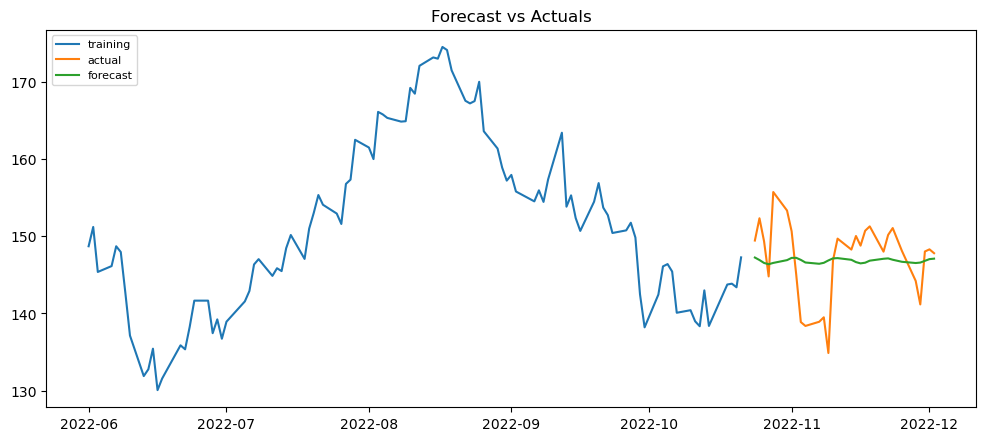

In [94]:
# Build Model
model = ARIMA(train_df, order=(2, 1, 2))  
fitted = model.fit()  

# Forecast
fc = fitted.forecast(29, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc.values, index=test_df.index)


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df[-100 :], label='training')
plt.plot(test_df, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Diagnostic Checking on Residuals

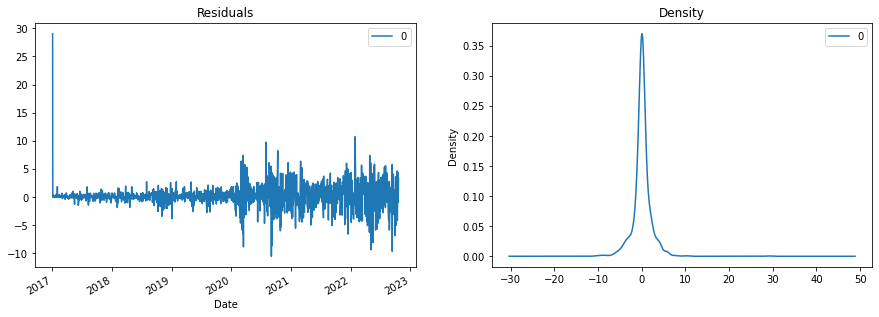

In [96]:
# Plot residual errors
residuals = pd.DataFrame(fitted.resid)
fig, ax = plt.subplots(1,2,figsize=(15, 5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

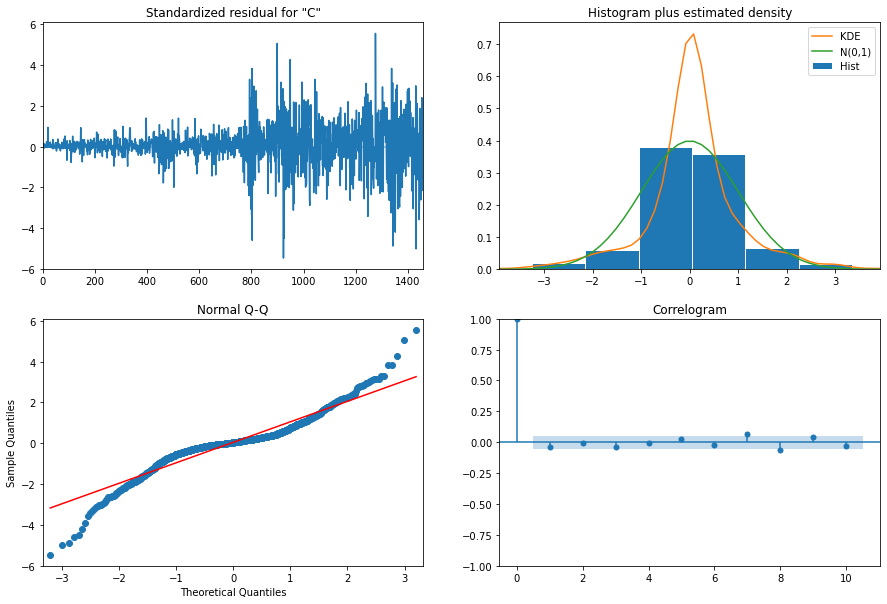

In [97]:
fitted.plot_diagnostics(figsize=(15,10))
plt.show()

## Auto-ARIMA Modeling

In [99]:
import pmdarima as pm

model = pm.auto_arima(close_price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6336.217, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6340.267, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6336.242, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6335.836, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6340.566, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6336.428, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6338.117, Time=1.70 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6336.489, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.160 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1491
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3164.918
Date:                Tue, 13 Dec 2022   AIC                           6335.836
Time:                        00:15:2

C:\Users\Setar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


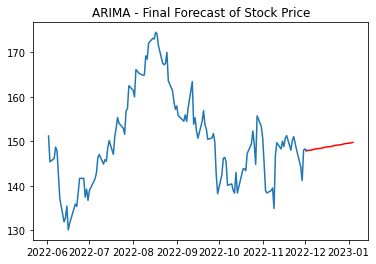

In [100]:
# Forecast
n_periods = 24
fitted = model.predict(n_periods=n_periods, alpha=0.05)
index_of_fc = pd.date_range(close_price.index[-1], periods = n_periods, freq='B')

# make series for plotting purpose
fitted_series = pd.Series(fitted.values, index=index_of_fc)


# Plot
plt.plot(close_price[close_price.index > '2022-06-01'])
plt.plot(fitted_series, color='red')


plt.title("ARIMA - Final Forecast of Stock Price")
plt.show()